In [1]:
import matplotlib
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs



In [2]:
df = gpd.read_file('../../PythonMapsData/NaturalEarth/10m_cultural/ne_10m_admin_0_countries.shp')



C:\Users\symmy\AppData\Local\Temp\ipykernel_15668\1347735857.py:6: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  Polygons = list(mal.iloc[0].geometry)
C:\Users\symmy\AppData\Local\Temp\ipykernel_15668\1347735857.py:6: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  Polygons = list(mal.iloc[0].geometry)
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [3]:

asia_rivers = gpd.read_file("../../Nature/rivers/data/rivers/asia/a00000009.gdbtable")

print(asia_rivers)

         HYRIV_ID  NEXT_DOWN  MAIN_RIV  LENGTH_KM   DIST_DN_KM  DIST_UP_KM  \
0        40000001   40000019  40017702       2.48  3056.600098         6.9   
1        40000002   40000019  40017702       1.23  3056.800049         6.0   
2        40000003   40000015  40017702       1.26  3052.800049         7.4   
3        40000004   40000015  40017702       1.30  3052.600098         7.9   
4        40000005   40000004  40017702       0.69  3054.100098         6.4   
...           ...        ...       ...        ...          ...         ...   
1428954  41428955          0  41428955       3.55     0.000000         7.8   
1428955  41428956          0  41428956       1.64     0.000000         2.9   
1428956  41428957          0  41428957       2.24     0.000000        18.5   
1428957  41428958          0  41428958       5.46     0.000000         7.4   
1428958  41428959          0  41428959       7.76     0.000000         9.3   

         CATCH_SKM  UPLAND_SKM  ENDORHEIC  DIS_AV_CMS  ORD_STRA

In [4]:
asia_rivers = gpd.sjoin(asia_rivers, sub_cont, op='within')

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<AxesSubplot:>

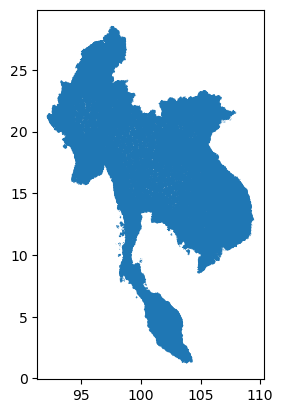

In [5]:
asia_rivers.plot()

In [6]:
asia_rivers = asia_rivers.drop(columns=['index_right'])

In [7]:
lakes = gpd.read_file("../../PythonMapsData/NaturalEarth/10m_physical/ne_10m_lakes.shp")
lakes = lakes.loc[lakes['featurecla'] == 'Lake']
lakes = lakes.dropna(subset=['name'])

asia_lakes = gpd.sjoin(lakes, sub_cont, op='intersects')
asia_lakes = lakes.loc[lakes.index.isin(asia_lakes.index.tolist())]
excluded_rivers = gpd.sjoin(asia_rivers, asia_lakes, op='within')
asia_rivers = asia_rivers.loc[~asia_rivers.index.isin(excluded_rivers.index.tolist())]

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [8]:
asia_rivers = asia_rivers.loc[asia_rivers['ORD_FLOW'] < 8]

In [9]:
basins = gpd.read_file("../../Nature/rivers/data/basins/asia/hydrobasins_asia.shp")
                

In [10]:
new_basins = gpd.sjoin(basins, sub_cont, op="intersects")

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [11]:
from shapely.ops import unary_union

geoms = [unary_union(new_basins.loc[new_basins['MAJ_NAME'] == poly_basin].geometry.tolist()) for poly_basin in new_basins.MAJ_NAME.unique().tolist()]
geoms_area = [geom.area for geom in geoms]
names = [poly_basin for poly_basin in new_basins.MAJ_NAME.unique().tolist()]

In [12]:
new_basins = gpd.GeoDataFrame(pd.DataFrame({"name": names, "area": geoms_area}), geometry=geoms)

In [13]:
new_basins = new_basins.sort_values(["area"], ascending=False)

In [14]:
new_basins_copy = new_basins.copy()

colors = {
     'Siberia, West Coast': 'black', 
     'Ob': '#ffa500', 
     'Lena': '#808000', 
     'Yenisey': '#483d8b',
     'Siberia, North Coast': '#dc143c',
     'Amur': 'lime', 
     'Gobi Interior': 'lightgray', 
     'Volga': 'red', 
     'Arabian Peninsula': 'lightgray', 
     'Yangtze': 'blue', 
     'Tarim Interior': '#008856', 
     'Ganges - Bramaputra': 'darkgreen', 
     'Kara Sea Coast': '#228B22', 
     'Syr Darya': '#3cb371', 
     'Russia, Barents Sea Coast': 'blue', 
     'Caspian Sea, East Coast': '#2f4f4f', 
     'Tigris - Euphrates': '#0000ff',
     'Amu Darya': '#ff00ff', 
     'Huang He': 'red', 
     'Indus': '#BE0032', 
     'Central Iran': '#ff1493',
     'Mekong': 'darkgreen', 
     'Caspian Sea Coast': 'black', 
     'China Coast': 'blue',
     'Don': '#808000', 
     'Scandinavia, North Coast': '#483d8b', 
     'Lake Balkash': '#dc143c', 
     'Red Sea, East Coast': '#000080',
     'Sabarmati': 'blue',
     'Northern Dvina': '#8b008b',
     'Finland': '#ff4500', 
     'Plateau of Tibet Interior': '#ffa500', 
     'Japan': '#008856', 
     'Bo Hai - Korean Bay, North Coast': '#882D17', 
     'Caspian Sea, South West Coast': '#228B22', 
     'Neva': '#3cb371',
     'Xun Jiang': '#875692', 
     'Ziya He, Interior': '#2f4f4f', 
     'Irrawaddy': 'crimson', 
     'Dnieper': '#ff00ff', 
     'Black Sea, South Coast': '#1e90ff', 
     'Mediterranean Sea, East Coast': '#db7093',
     'Ural': '#ffa500', 
     'Godavari': 'blue', 
     'Peninsula Malaysia': 'blue',
     'Philippines': '#A1CAF1', 
     'Salween': '#483d8b', 
     'Helmand': 'black',
     'Krishna': '#808000', 
     'Persian Gulf Coast': '#483d8b',
     'North and South Korea': 'black', 
     'Eastern Jordan - Syria': '#ffa500',
     'Russia, South East Coast': '#808000', 
     'Arabian Sea Coast': '#483d8b', 
     'Hamun-i-Mashkel': '#dc143c',
     'North Borneo Coast': 'lime', 
     'Viet Nam, Coast': 'blue', 
     'Hong (Red River)': '#8b008b', 
     'Chao Phraya': '#ff4500', 
     'Black Sea, North Coast': 'blue', 
     'Mahandi': 'crimson',
     'Daugava': 'darkgreen',
     'Kalimantan': '#228B22', 
     'Narmada': 'purple',
     'Farahrud': '#875692', 
     'Adriatic Sea - Greece - Black Sea Coast': '#2f4f4f', 
     'Bay of Bengal, North East Coast': '#0000ff',
     'India West Coast': '#ff00ff', 
     'Cauvery': '#1e90ff',
     'Pennar': '#BE0032', 
     'Tapti': '#ff1493',
     'Yasai': '#882D17', 
     'South China Sea Coast': 'black',
     'Narva': 'blue',
     'Sri Lanka': '#808000', 
     'India East Coast': '#483d8b',
     'India South Coast': '#dc143c', 
     'Sittang': '#000080', 
     'Brahamani': 'darkorange',
     'Gulf of Thailand Coast': '#8b008b', 
     'Dead Sea': '#ff4500', 
     'India North East Coast': '#ffa500',
     'Mahi': '#008856', 
     'Hainan': '#882D17', 
     'Baltic Sea Coast': '#228B22', 
     'Sinai Peninsula': '#3cb371',
     'Andaman - Nicobar Islands': '#875692', 
     'Taiwan': '#2f4f4f'}

colors_df = pd.DataFrame({'basin': colors.keys(), 'colors': colors.values()})

In [15]:
print(colors_df)

                        basin   colors
0         Siberia, West Coast    black
1                          Ob  #ffa500
2                        Lena  #808000
3                     Yenisey  #483d8b
4        Siberia, North Coast  #dc143c
..                        ...      ...
83                     Hainan  #882D17
84           Baltic Sea Coast  #228B22
85            Sinai Peninsula  #3cb371
86  Andaman - Nicobar Islands  #875692
87                     Taiwan  #2f4f4f

[88 rows x 2 columns]


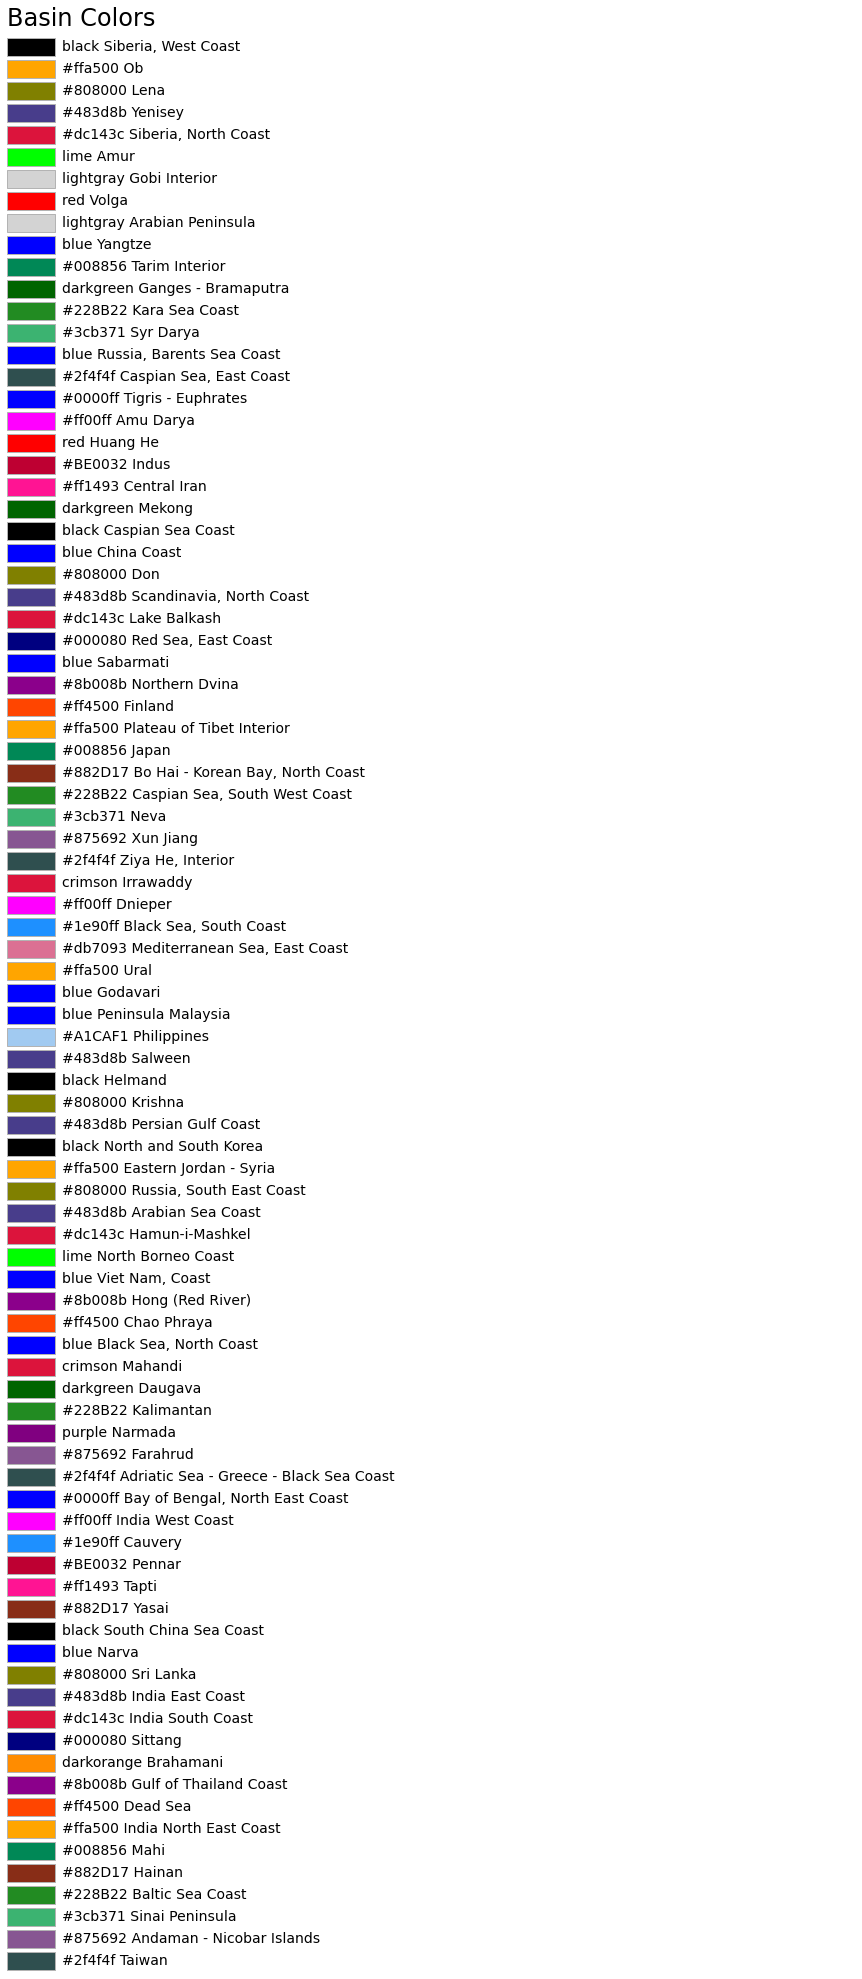

In [16]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


cell_width = 212
cell_height = 22
swatch_width = 48
margin = 12
topmargin = 40

n = len(colors.keys())
ncols = 1
nrows = len(colors.keys())
width = cell_width * 4 + 2 * margin
height = cell_height * nrows + margin + topmargin
dpi = 72

fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
fig.subplots_adjust(margin/width, margin/height,
                    (width-margin)/width, (height-topmargin)/height)
ax.set_xlim(0, cell_width * 4)
ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
ax.set_axis_off()
ax.set_title("Basin Colors", fontsize=24, loc="left", pad=10)

for i, (name, basin) in enumerate(zip(colors.values(), colors.keys())):
    row = i % nrows
    col = i // nrows
    y = row * cell_height

    swatch_start_x = cell_width * col
    text_pos_x = cell_width * col + swatch_width + 7

    ax.text(text_pos_x, y, (name + " " + basin), fontsize=14,
            horizontalalignment='left',
            verticalalignment='center')

    ax.add_patch(
        Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                  height=18, facecolor=name, edgecolor='0.7')
    )


In [17]:
new_basins_copy = pd.merge(new_basins_copy, colors_df, left_on='name', right_on='basin', how='left')

In [18]:
new_basins_copy = new_basins_copy[['name', 'geometry', 'colors']]

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\geopandas\plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


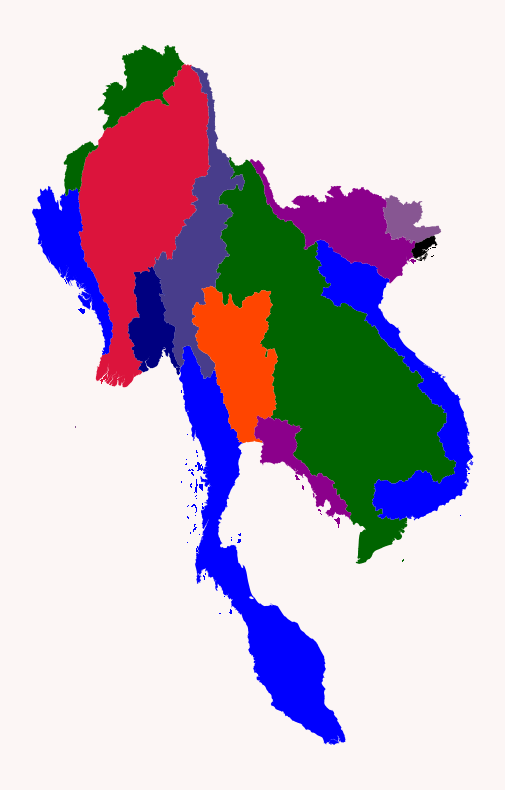

In [19]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF', figsize=(10,10))
new_basins_copy.plot(ax=ax, column='name', color=new_basins_copy['colors'])
ax.axis('off')
plt.savefig("test.png", dpi=600, bbox_inches='tight')

In [20]:
rivers_basins = gpd.sjoin(asia_rivers, new_basins_copy, op='within')

C:\Users\symmy\anaconda3\envs\pythonmaps\lib\site-packages\IPython\core\interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\symmy\AppData\Local\Temp\ipykernel_15668\549450257.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  rivers_basins = gpd.sjoin(asia_rivers, new_basins_copy, op='within')


In [21]:
print(new_basins_copy)

                               name  \
0                            Mekong   
1                         Irrawaddy   
2                Peninsula Malaysia   
3                   Viet Nam, Coast   
4                           Salween   
5                       Chao Phraya   
6                  Hong (Red River)   
7   Bay of Bengal, North East Coast   
8               Ganges - Bramaputra   
9                           Sittang   
10           Gulf of Thailand Coast   
11                        Xun Jiang   
12            South China Sea Coast   
13        Andaman - Nicobar Islands   

                                             geometry     colors  
0   MULTIPOLYGON (((101.53750 16.95000, 101.53333 ...  darkgreen  
1   MULTIPOLYGON (((95.07083 16.00000, 95.07083 16...    crimson  
2   MULTIPOLYGON (((98.47083 8.21667, 98.46667 8.2...       blue  
3   MULTIPOLYGON (((105.65417 11.97500, 105.66667 ...       blue  
4   MULTIPOLYGON (((98.08333 18.84583, 98.08333 18...    #483d8b  
5   POLYGON 

In [35]:
import numpy as np

def scale_lw(df: gpd.GeoDataFrame, column_name: str, min_value: float = 0.005, max_value: float = 0.6):
    leftSpan = np.amax(df[column_name]) - np.amin(df[column_name])
    rightSpan = max_value - min_value
    valueScaled = (df[column_name] - np.amin(df[column_name])) / leftSpan
    df[f'LW_{column_name}'] = min_value + (valueScaled * rightSpan)
    return df

rivers_basins = scale_lw(rivers_basins, 'DIST_UP_KM', min_value=0.02, max_value=0.8)
rivers_basins = scale_lw(rivers_basins, 'LENGTH_KM', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'CATCH_SKM', min_value=0.04, max_value=0.4)
rivers_basins = scale_lw(rivers_basins, 'DIS_AV_CMS', min_value=0.02, max_value=0.8)
rivers_basins = scale_lw(rivers_basins, 'UPLAND_SKM', min_value=0.04, max_value=0.4)

In [23]:
x = unary_union(sub_cont.geometry.tolist())
y = x.boundary
asia = gpd.GeoDataFrame(pd.DataFrame({'name': ['asia']}), crs="EPSG:4326", geometry=[y])

In [24]:
# Say, "the default sans-serif font is COMIC SANS"
matplotlib.rcParams['font.sans-serif'] = "gabriola"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"

logo = plt.imread('../../Branding/globe.png')

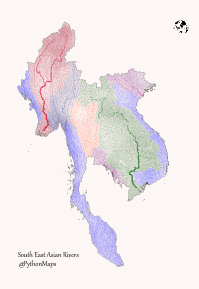

In [40]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIS_AV_CMS'])
asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')
newax = fig.add_axes([0.6, 0.8, 0.05, 0.05], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.05, 0.05, "South East Asian Rivers\n@PythonMaps",
              size=6,
              color='black',
              transform = ax.transAxes)

ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/seasia1.png", dpi=600, bbox_inches='tight')
plt.show()

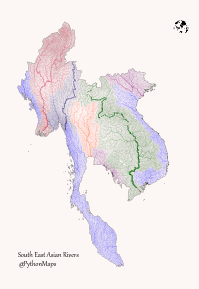

In [41]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')
newax = fig.add_axes([0.6, 0.8, 0.05, 0.05], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.05, 0.05, "South East Asian Rivers\n@PythonMaps",
              size=6,
              color='black',
              transform = ax.transAxes)

ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/seasia2.png", dpi=600, bbox_inches='tight')
plt.show()

In [26]:
=

SyntaxError: invalid syntax (1763773627.py, line 1)

In [ ]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(7, 3.5)

rivers_basins.plot(ax=ax, edgecolor='face', color=rivers_basins['colors'], lw=rivers_basins['LW_DIST_UP_KM'])
asia.plot(ax=ax, color="black", lw=0.1)
asia_lakes.plot(ax=ax, color='#FCF6F5FF')
newax = fig.add_axes([0.58, 0.8, 0.08, 0.08], anchor='NE', zorder=-1)
newax.imshow(logo)
newax.axis('off')
txt = ax.text(0.05, 0.05, "South East Asian Rivers \n@PythonMaps",
              size=6,
              color='grey',
              transform = ax.transAxes)

ax.axis('off')
#ax.set_ylim(0, 43)
#ax.set_xlim(62, 125)

plt.savefig("outputs/seasia_website.jpeg", dpi=600, bbox_inches='tight')
plt.show()